In [1]:
import pandas as pd


In [4]:
data = pd.read_csv('data/testdata.csv', index_col=0, parse_dates=True)
data.columns= ['Energy']

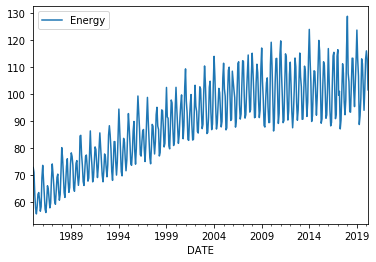

In [5]:
data.plot()

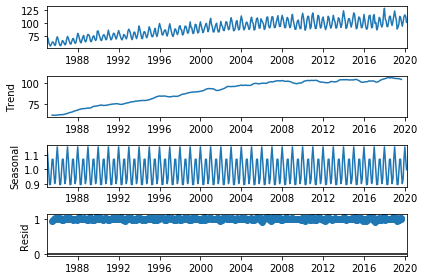

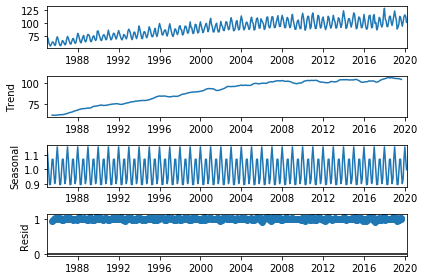

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result.plot()

In [8]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1936.598, BIC=1956.679, Time=2.525 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=2178.328, BIC=2186.361, Time=0.055 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=2111.748, BIC=2127.813, Time=0.512 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1990.540, BIC=2006.605, Time=0.828 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=2176.336, BIC=2180.352, Time=0.037 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=2071.615, BIC=2087.680, Time=0.878 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=1934.649, BIC=1958.746, Time=4.753 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=2029.181, BIC=2049.262, Time=2.511 seconds
Near 

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 1)x(2, 1, 1, 12) (constant=True); AIC=1918.035, BIC=1946.148, Time=11.332 seconds
Fit ARIMA: (1, 1, 1)x(2, 1, 0, 12) (constant=True); AIC=1972.764, BIC=1996.860, Time=8.550 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 1)x(2, 1, 2, 12) (constant=True); AIC=1910.860, BIC=1942.989, Time=11.306 seconds


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=1930.293, BIC=1958.407, Time=9.931 seconds
Fit ARIMA: (0, 1, 1)x(2, 1, 2, 12) (constant=True); AIC=1952.826, BIC=1980.939, Time=6.148 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 2, 12) (constant=True); AIC=1984.036, BIC=2012.149, Time=4.630 seconds


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (2, 1, 1)x(2, 1, 2, 12) (constant=True); AIC=1912.203, BIC=1948.348, Time=14.690 seconds


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 2)x(2, 1, 2, 12) (constant=True); AIC=1912.400, BIC=1948.546, Time=13.834 seconds
Fit ARIMA: (0, 1, 0)x(2, 1, 2, 12) (constant=True); AIC=2014.113, BIC=2038.210, Time=4.075 seconds
Fit ARIMA: (0, 1, 2)x(2, 1, 2, 12) (constant=True); AIC=1920.571, BIC=1952.700, Time=15.722 seconds
Fit ARIMA: (2, 1, 0)x(2, 1, 2, 12) (constant=True); AIC=1957.967, BIC=1990.096, Time=6.277 seconds


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (2, 1, 2)x(2, 1, 2, 12) (constant=True); AIC=1916.602, BIC=1956.764, Time=15.541 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Total fit time: 134.174 seconds
1910.8599009931268


In [13]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [14]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 2, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [20]:
future_forecast = stepwise_model.predict(n_periods=39)

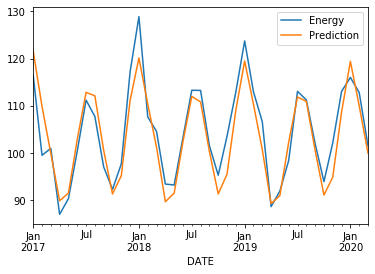

In [21]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()